Остановка на поколении 29 для N=50, mutation_rate=0.01, crossover_rate=0.6
Остановка на поколении 15 для N=50, mutation_rate=0.01, crossover_rate=0.8
Остановка на поколении 20 для N=50, mutation_rate=0.01, crossover_rate=1.0
Остановка на поколении 21 для N=50, mutation_rate=0.05, crossover_rate=0.6
Остановка на поколении 19 для N=50, mutation_rate=0.05, crossover_rate=0.8
Остановка на поколении 19 для N=50, mutation_rate=0.05, crossover_rate=1.0
Остановка на поколении 36 для N=50, mutation_rate=0.1, crossover_rate=0.6
Остановка на поколении 22 для N=50, mutation_rate=0.1, crossover_rate=0.8
Остановка на поколении 24 для N=50, mutation_rate=0.1, crossover_rate=1.0
Остановка на поколении 25 для N=100, mutation_rate=0.01, crossover_rate=0.6
Остановка на поколении 23 для N=100, mutation_rate=0.01, crossover_rate=0.8


C:\Users\Dmitry\AppData\Local\Temp\ipykernel_11984\401443530.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_fitness_history[generation] = best_fitness


Остановка на поколении 13 для N=100, mutation_rate=0.01, crossover_rate=1.0
Остановка на поколении 31 для N=100, mutation_rate=0.05, crossover_rate=0.6
Остановка на поколении 33 для N=100, mutation_rate=0.05, crossover_rate=0.8
Остановка на поколении 37 для N=100, mutation_rate=0.05, crossover_rate=1.0
Остановка на поколении 32 для N=100, mutation_rate=0.1, crossover_rate=0.6
Остановка на поколении 49 для N=100, mutation_rate=0.1, crossover_rate=0.8
Остановка на поколении 10 для N=100, mutation_rate=0.1, crossover_rate=1.0
Остановка на поколении 42 для N=150, mutation_rate=0.01, crossover_rate=0.6
Остановка на поколении 49 для N=150, mutation_rate=0.01, crossover_rate=0.8
Остановка на поколении 39 для N=150, mutation_rate=0.01, crossover_rate=1.0
Остановка на поколении 49 для N=150, mutation_rate=0.05, crossover_rate=0.6
Остановка на поколении 24 для N=150, mutation_rate=0.05, crossover_rate=0.8
Остановка на поколении 47 для N=150, mutation_rate=0.05, crossover_rate=1.0
Остановка на по

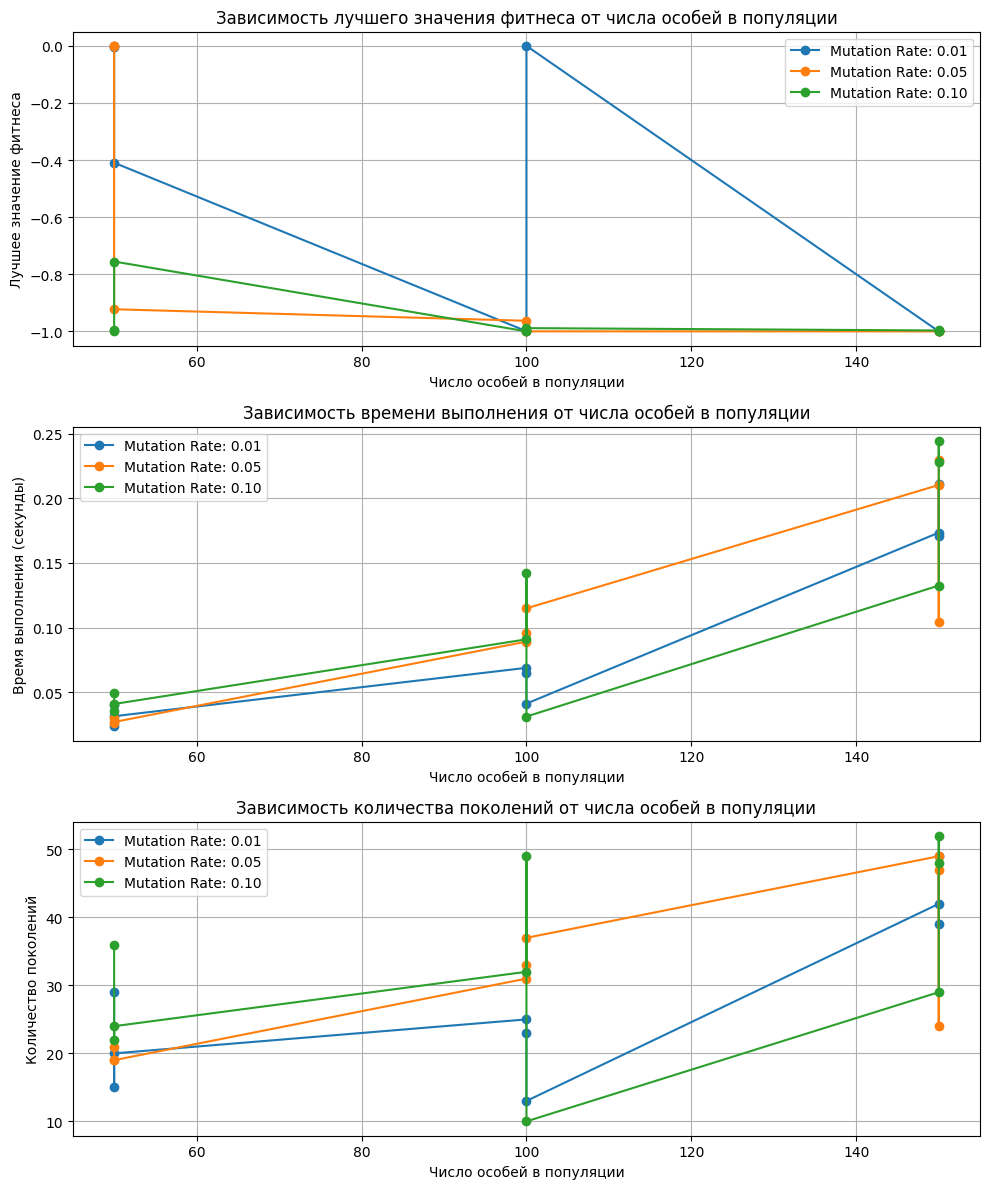

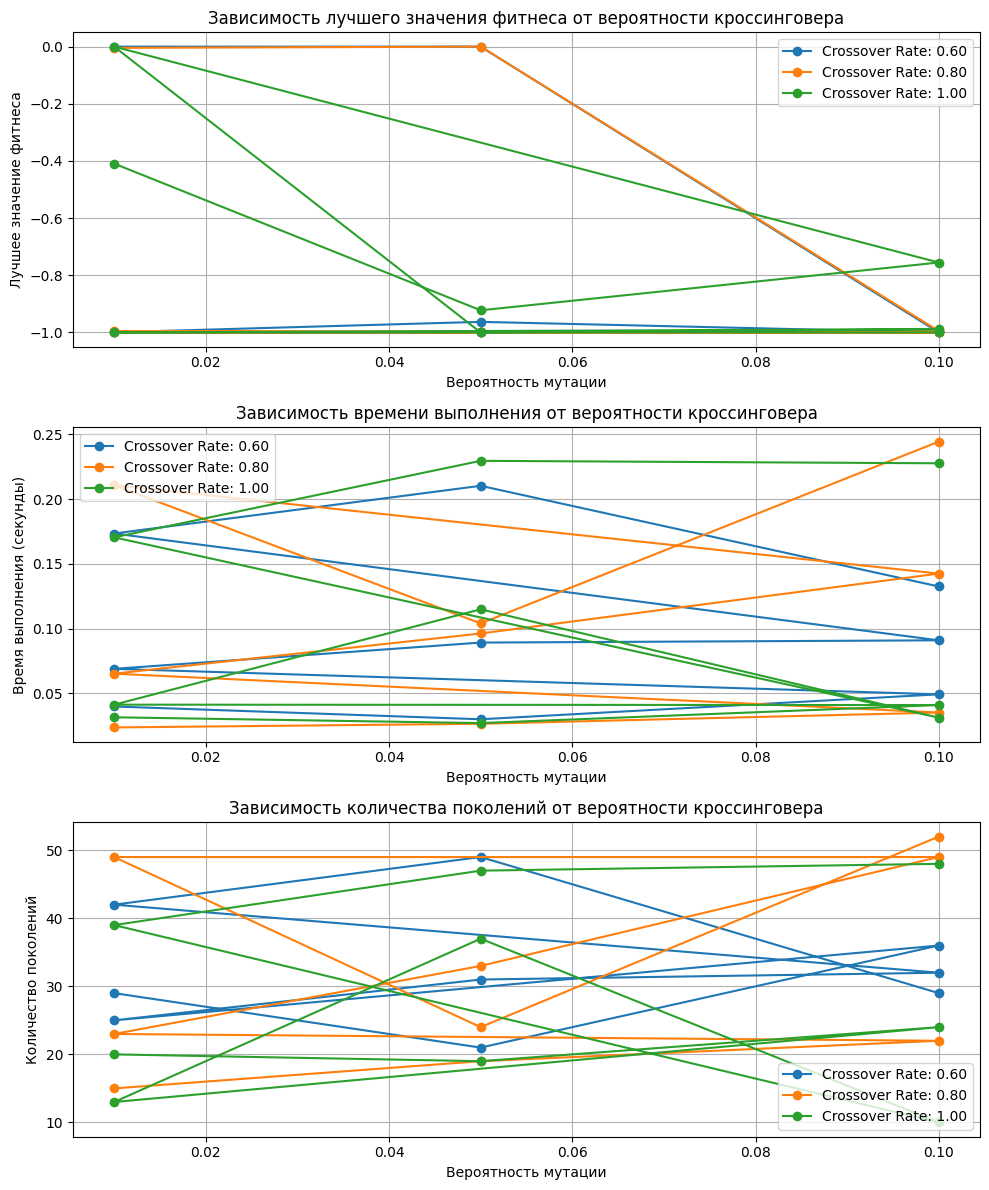

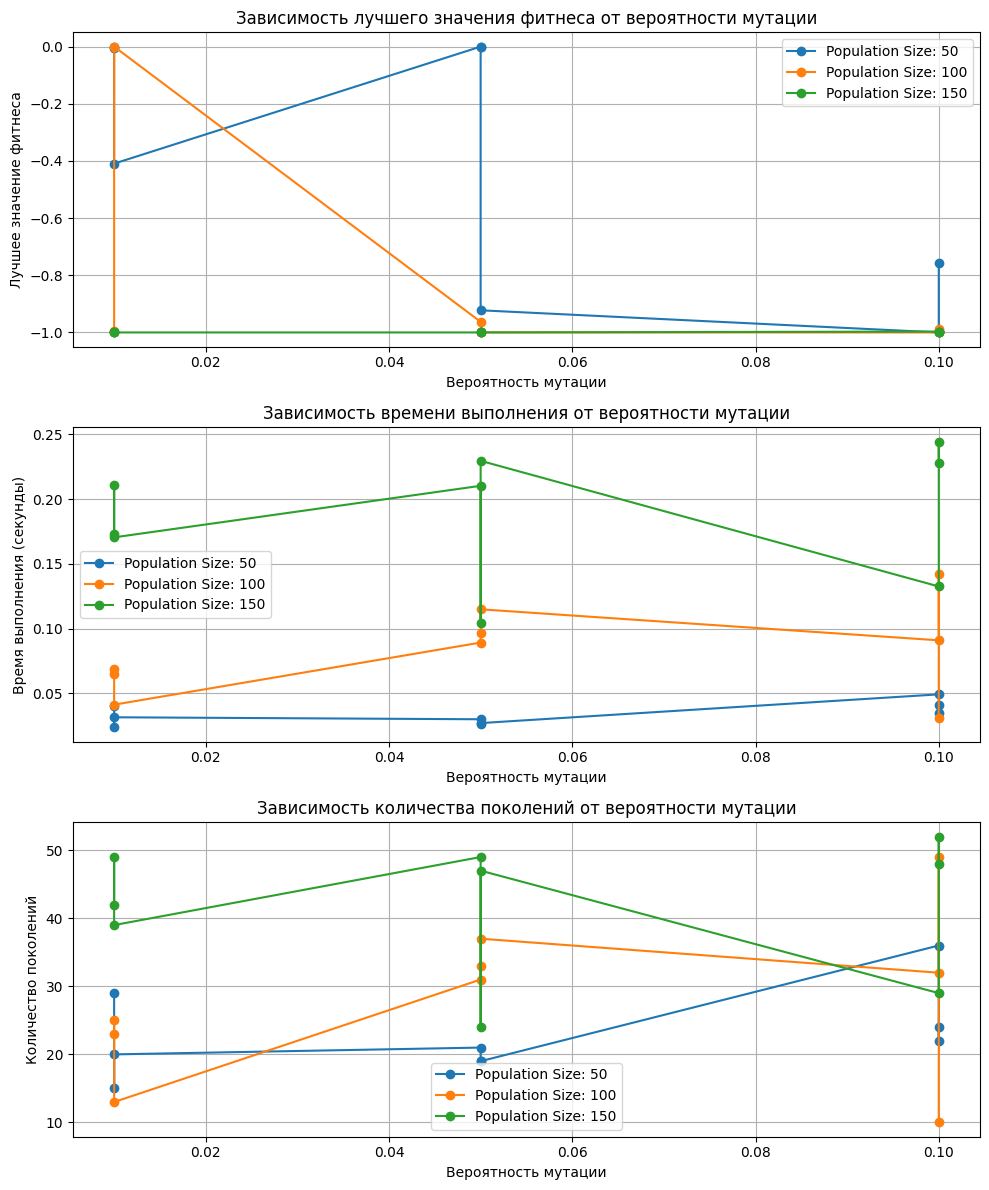

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Параметры генетического алгоритма
population_sizes = [50, 100, 150]  # Размеры популяции для тестирования
mutation_rates = [0.01, 0.05, 0.1]  # Вероятности мутации для тестирования
crossover_rates = [0.6, 0.8, 1.0]  # Вероятности кроссинговера для тестирования
max_stagnation = 10  # Максимальное количество поколений без улучшения
max_generations = 100  # Максимальное количество поколений

# Диапазон значений x
x_min = -100
x_max = 100


# Функция, которую оптимизируем (функция Эасома)
def fitness_function(x):
    return -np.cos(x[:, 0]) * np.cos(x[:, 1]) * np.exp(-((x[:, 0] - np.pi) ** 2 + (x[:, 1] - np.pi) ** 2))


# Функция турнирового отбора
def tournament_selection(population, fitness_values, tournament_size=3):
    selected_parents = []
    for _ in range(2):  # Селектируем двух родителей
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]
        winner_index = tournament_indices[np.argmin(tournament_fitness)]  # Минимизация
        selected_parents.append(population[winner_index])
    return np.array(selected_parents)


# Функция кроссинговера
def crossover(parent1, parent2):
    alpha = np.random.rand()  # Случайный коэффициент для интерполяции
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = (1 - alpha) * parent1 + alpha * parent2
    return child1, child2


# Функция мутации
def mutate(individual, mutation_rate, x_min, x_max):
    if np.random.rand() < mutation_rate:
        mutation_value = np.random.uniform(x_min, x_max, size=individual.shape)
        individual += mutation_value  # Применение мутации
        individual = np.clip(individual, x_min, x_max)  # Ограничение в пределах допустимого диапазона
    return individual


# Для хранения результатов
results = []

# Проход по всем параметрам
for N in population_sizes:
    for mutation_rate in mutation_rates:
        for crossover_rate in crossover_rates:
            # Инициализация начальной популяции
            population = np.random.uniform(x_min, x_max, (N, 2))

            best_fitness_history = np.zeros(max_generations)
            best_solution = population[0, :]
            best_fitness = fitness_function(population[0, :].reshape(1, -1))

            stagnation_counter = 0

            # Начало измерения времени
            start_time = time.time()

            for generation in range(max_generations):
                # Оценка популяции
                fitness_values = fitness_function(population)

                # Поиск лучшего решения
                current_best_fitness = np.min(fitness_values)
                best_idx = np.argmin(fitness_values)

                if current_best_fitness < best_fitness:
                    best_fitness = current_best_fitness
                    best_solution = population[best_idx, :]
                    stagnation_counter = 0  # Сброс счетчика застоя
                else:
                    stagnation_counter += 1  # Увеличение счетчика застоя

                # Селекция: турнирный отбор
                new_population = population.copy()
                for i in range(0, N, 2):
                    parents = tournament_selection(population, fitness_values)

                    # Кроссинговер
                    if np.random.rand() < crossover_rate:
                        child1, child2 = crossover(parents[0], parents[1])
                    else:
                        child1 = parents[0]
                        child2 = parents[1]

                    # Мутация
                    child1 = mutate(child1, mutation_rate, x_min, x_max)
                    child2 = mutate(child2, mutation_rate, x_min, x_max)

                    new_population[i] = child1
                    new_population[i + 1] = child2

                population = new_population
                best_fitness_history[generation] = best_fitness

                # Проверка условий остановки
                if stagnation_counter >= max_stagnation:
                    print(
                        f'Остановка на поколении {generation} для N={N}, mutation_rate={mutation_rate}, crossover_rate={crossover_rate}')
                    break

            # Конец измерения времени
            elapsed_time = time.time() - start_time

            # Сохранение результатов
            results.append({
                'N': N,
                'mutationRate': mutation_rate,
                'crossoverRate': crossover_rate,
                'bestSolution': best_solution,
                'bestFitness': best_fitness,
                'elapsedTime': elapsed_time,
                'generations': generation
            })

# Визуализация результатов для числа особей в популяции
plt.figure(figsize=(10, 12))

# Подграфик 1
plt.subplot(3, 1, 1)
for mutation_rate in mutation_rates:
    idx = [result for result in results if result['mutationRate'] == mutation_rate]
    plt.plot([result['N'] for result in idx], [result['bestFitness'] for result in idx], '-o',
             label=f'Mutation Rate: {mutation_rate:.2f}')
plt.xlabel('Число особей в популяции')
plt.ylabel('Лучшее значение фитнеса')
plt.title('Зависимость лучшего значения фитнеса от числа особей в популяции')
plt.legend()
plt.grid()

# Подграфик 2
plt.subplot(3, 1, 2)
for mutation_rate in mutation_rates:
    idx = [result for result in results if result['mutationRate'] == mutation_rate]
    plt.plot([result['N'] for result in idx], [result['elapsedTime'] for result in idx], '-o',
             label=f'Mutation Rate: {mutation_rate:.2f}')
plt.xlabel('Число особей в популяции')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения от числа особей в популяции')
plt.legend()
plt.grid()

# Подграфик 3
plt.subplot(3, 1, 3)
for mutation_rate in mutation_rates:
    idx = [result for result in results if result['mutationRate'] == mutation_rate]
    plt.plot([result['N'] for result in idx], [result['generations'] for result in idx], '-o',
             label=f'Mutation Rate: {mutation_rate:.2f}')
plt.xlabel('Число особей в популяции')
plt.ylabel('Количество поколений')
plt.title('Зависимость количества поколений от числа особей в популяции')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Визуализация результатов для вероятности кроссинговера
plt.figure(figsize=(10, 12))

# Подграфик 1
plt.subplot(3, 1, 1)
for crossover_rate in crossover_rates:
    idx = [result for result in results if result['crossoverRate'] == crossover_rate]
    plt.plot([result['mutationRate'] for result in idx], [result['bestFitness'] for result in idx], '-o',
             label=f'Crossover Rate: {crossover_rate:.2f}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Лучшее значение фитнеса')
plt.title('Зависимость лучшего значения фитнеса от вероятности кроссинговера')
plt.legend()
plt.grid()

# Подграфик 2
plt.subplot(3, 1, 2)
for crossover_rate in crossover_rates:
    idx = [result for result in results if result['crossoverRate'] == crossover_rate]
    plt.plot([result['mutationRate'] for result in idx], [result['elapsedTime'] for result in idx], '-o',
             label=f'Crossover Rate: {crossover_rate:.2f}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения от вероятности кроссинговера')
plt.legend()
plt.grid()

# Подграфик 3
plt.subplot(3, 1, 3)
for crossover_rate in crossover_rates:
    idx = [result for result in results if result['crossoverRate'] == crossover_rate]
    plt.plot([result['mutationRate'] for result in idx], [result['generations'] for result in idx], '-o',
             label=f'Crossover Rate: {crossover_rate:.2f}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Количество поколений')
plt.title('Зависимость количества поколений от вероятности кроссинговера')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Визуализация результатов для вероятности мутации
plt.figure(figsize=(10, 12))

# Подграфик 1
plt.subplot(3, 1, 1)
for N in population_sizes:
    idx = [result for result in results if result['N'] == N]
    plt.plot([result['mutationRate'] for result in idx], [result['bestFitness'] for result in idx], '-o',
             label=f'Population Size: {N}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Лучшее значение фитнеса')
plt.title('Зависимость лучшего значения фитнеса от вероятности мутации')
plt.legend()
plt.grid()

# Подграфик 2
plt.subplot(3, 1, 2)
for N in population_sizes:
    idx = [result for result in results if result['N'] == N]
    plt.plot([result['mutationRate'] for result in idx], [result['elapsedTime'] for result in idx], '-o',
             label=f'Population Size: {N}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения от вероятности мутации')
plt.legend()
plt.grid()

# Подграфик 3
plt.subplot(3, 1, 3)
for N in population_sizes:
    idx = [result for result in results if result['N'] == N]
    plt.plot([result['mutationRate'] for result in idx], [result['generations'] for result in idx], '-o',
             label=f'Population Size: {N}')
plt.xlabel('Вероятность мутации')
plt.ylabel('Количество поколений')
plt.title('Зависимость количества поколений от вероятности мутации')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()